In [1]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from PIL import Image as PILImage
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
import joblib
import os
import cv2
from LocalBinaryPattern import LBP as LocBinPat
from sklearn.metrics import accuracy_score

In [2]:
lbp = LocBinPat()

In [3]:
age_groups = {
        '[0 - 6]': [],
        '[7 - 17]': [],
        '[18 - 28]': [],
        '[29 - 35]': [],
        '[36 - 44]': [],
        '[45 - 53]': [],
        '[54 - 62]': [],
        '[63+]': []
    }

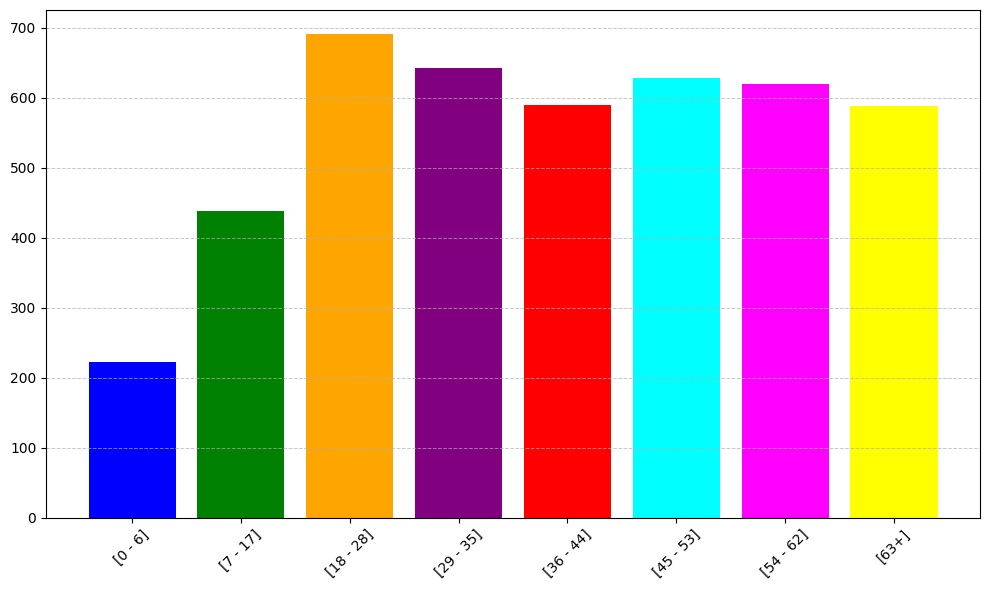

In [6]:
def plot_age_group_distribution_with_colors(folder_path):

    age_groups = {
        '[0 - 6]': [],
        '[7 - 17]': [],
        '[18 - 28]': [],
        '[29 - 35]': [],
        '[36 - 44]': [],
        '[45 - 53]': [],
        '[54 - 62]': [],
        '[63+]': []
    }

    for file_name in os.listdir(folder_path):

        try:
            age = int(file_name.split('_')[0])  
        except ValueError:
            continue 


        if 0 <= age <= 6:
            age_groups['[0 - 6]'].append(file_name)
        elif 7 <= age <= 17:
            age_groups['[7 - 17]'].append(file_name)
        elif 18 <= age <= 28:
            age_groups['[18 - 28]'].append(file_name)
        elif 29 <= age <= 35:
            age_groups['[29 - 35]'].append(file_name)
        elif 36 <= age <= 44:
            age_groups['[36 - 44]'].append(file_name)
        elif 45 <= age <= 53:
            age_groups['[45 - 53]'].append(file_name)
        elif 54 <= age <= 62:
            age_groups['[54 - 62]'].append(file_name)
        else:
            age_groups['[63+]'].append(file_name)

    counts = {key: len(files) for key, files in age_groups.items()}

    colors = [
        'blue', 'green', 'orange', 'purple', 'red',
        'cyan', 'magenta', 'yellow', 'brown'
    ]

    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values(), color=colors[:len(counts)])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.show()

folder_path = r"C:\Users\peter\Desktop\Studia II stopień\SIIUM\II sem\AOC\3rdattempt\processed_faces\white_men\resized_faces"
plot_age_group_distribution_with_colors(folder_path)


In [7]:
def process_dataset(folder_path):
    age_groups = {
        '[0 - 6]': 0,
        '[7 - 17]': 1,
        '[18 - 28]': 2,
        '[29 - 35]': 3,
        '[36 - 44]': 4,
        '[45 - 53]': 5,
        '[54 - 62]': 6,
        '[63+]': 7
    }

    X = []
    y = []
    file_paths = [] 

    lbp = LocBinPat()
    file_list = os.listdir(folder_path)
    total_files = len(file_list)
    
    for i, file_name in enumerate(file_list):
        try:
            print(f"Processing {total_files - i} images remaining...")
            
            age = int(file_name.split('_')[0])
            if 0 <= age <= 6:
                age_group = '[0 - 6]'
            elif 7 <= age <= 17:
                age_group = '[7 - 17]'
            elif 18 <= age <= 28:
                age_group = '[18 - 28]'
            elif 29 <= age <= 35:
                age_group = '[29 - 35]'
            elif 36 <= age <= 44:
                age_group = '[36 - 44]'
            elif 45 <= age <= 53:
                age_group = '[45 - 53]'
            elif 54 <= age <= 62:
                age_group = '[54 - 62]'
            else:
                age_group = '[63+]'

            image_path = os.path.join(folder_path, file_name)
            image = lbp.get_RGB(image_path)
            histogram = lbp.LBP_histogram(image)

            X.append(histogram)
            y.append(age_groups[age_group])
            file_paths.append(image_path)  

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")
            continue

    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test, train_paths, test_paths = train_test_split(
        X, y, file_paths, test_size=0.2, stratify=y, random_state=42
    )

    os.makedirs("processed_faces/white_women/train_data", exist_ok=True)
    os.makedirs("processed_faces/white_women/test_data", exist_ok=True)
    
    joblib.dump((X_train, y_train, train_paths), r"processed_faces/white_women/train_data/train_dataset.pkl")
    joblib.dump((X_test, y_test, test_paths), r"processed_faces/white_women/test_data/test_dataset.pkl")

    print("saved")

In [8]:
folder_path = r"C:\Users\peter\Desktop\Studia II stopień\SIIUM\II sem\AOC\3rdattempt\processed_faces\white_women\resized_faces"
# process_dataset(folder_path)

In [4]:
X_train, y_train, train_paths = joblib.load("processed_faces/white_women/train_data/train_dataset.pkl")
X_test, y_test, test_paths = joblib.load("processed_faces/white_women/test_data/test_dataset.pkl")

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"train_paths length: {len(train_paths)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"test_paths length: {len(test_paths)}")


X_train shape: (3441, 12288)
y_train shape: (3441,)
train_paths length: 3441
X_test shape: (861, 12288)
y_test shape: (861,)
test_paths length: 861


In [12]:
pca = PCA(n_components=0.95, svd_solver='full')

In [14]:
# X_train_pca = pca_men.fit_transform(X_train)
# X_test_pca = pca_men.transform(X_test)

In [ ]:
# joblib.dump(X_train_pca,)

In [10]:
# print(f"Original feature size: {X_train.shape[1]}")
# print(f"Reduced feature size (after PCA): {X_train_pca.shape[1]}")

Original feature size: 12288
Reduced feature size (after PCA): 182


In [29]:
# joblib.dump(pca, "processed_faces/white_women/pca_model.pkl")

['processed_faces/white_women/pca_model.pkl']

In [30]:
# np.save("processed_faces/white_women/train_data/X_train_pca.npy", X_train_pca)
# np.save("processed_faces/white_women/test_data/X_test_pca.npy", X_test_pca)

In [16]:
# X_train_pca = np.load("processed_faces\white_men\train_data\X_train_pca.npy")
# X_test_pca = np.load("processed_faces\white_men\test_data\X_test_pca.npy")   

['svm_model.pkl']

In [32]:
# svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, max_iter=50000)
# print("Training SVM...")
# svm.fit(X_train_pca, y_train)
# print("Training complete.")
# joblib.dump(svm, "processed_faces/white_women/svm_model.pkl")

Training SVM...
Training complete.


['processed_faces/white_women/svm_model.pkl']

In [18]:
# svm = joblib.load("svm_model.pkl") 

In [5]:
svm_men = joblib.load("processed_faces\white_men\svm_model.pkl")
svm_women = joblib.load("processed_faces\white_women\svm_model.pkl")

In [6]:
pca_men = joblib.load("processed_faces\white_men\pca_model.pkl")
pca_women = joblib.load("processed_faces\white_women\pca_model.pkl")

In [7]:
X_train_men, y_train_men, _ = joblib.load("processed_faces/white_men/train_data/train_dataset.pkl")
X_train_women, y_train_women, _ = joblib.load("processed_faces/white_women/train_data/train_dataset.pkl")

X_test_men, y_test_men, _ = joblib.load("processed_faces/white_men/test_data/test_dataset.pkl")
X_test_women, y_test_women, _ = joblib.load("processed_faces/white_women/test_data/test_dataset.pkl")

In [31]:
X_test_pca_women_on_pca_men_model = pca_men.transform(X_test_women)

In [54]:
X_test_pca_men_on_pca_women_model = pca_women.transform(X_test_men)

In [8]:
X_test_pca_women = np.load("processed_faces/white_women/test_data/X_test_pca.npy")
y_true_women = y_test_women
y_pred_women = joblib.load("processed_faces/white_women/test_data/test_predictions.pkl")


X_test_pca_men = np.load("processed_faces/white_men/test_data/X_test_pca.npy")
y_true_men = y_test_men
y_pred_men = joblib.load("processed_faces/white_men/test_data/test_predictions.pkl")

In [32]:
y_pred_women_on_men = svm_men.predict(X_test_pca_women_on_pca_men_model)

In [57]:
y_pred_men_on_women = svm_women.predict(X_test_pca_men_on_pca_women_model)

In [64]:
# joblib.dump(y_pred_men_on_women, "processed_faces/men_on_women/test_predictions.pkl")

['processed_faces/men_on_women/test_predictions.pkl']

In [12]:
cm = confusion_matrix(y_true_women, y_pred_women)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    '[0 - 6]', '[7 - 17]', '[18 - 28]', '[29 - 35]', '[36 - 44]', '[45 - 53]', '[54 - 62]', '[63+]'
])

In [14]:
accuracy = accuracy_score(y_true_women, y_pred_women)

In [9]:
def my_accuracy(y, y_pred):
    sum = 0
    for real, predicted in zip(y, y_pred):
        if abs(real - predicted) == 1:
            sum += 0.5
        if real == predicted:
            sum += 1
    return sum / len(y)

In [10]:
my_acc = my_accuracy(y_true_women, y_pred_women)

<Figure size 1000x800 with 0 Axes>

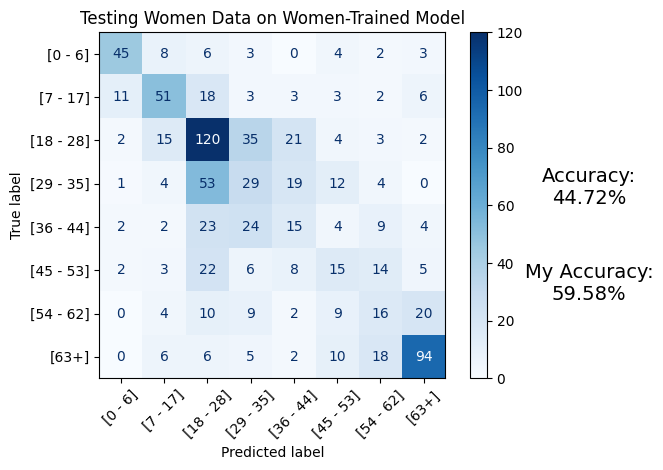

In [15]:
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45, colorbar=True)

# Add title
plt.title("Testing Women Data on Women-Trained Model")

# Add accuracy text (first line)
plt.figtext(0.95, 0.6, f"Accuracy:\n{accuracy * 100:.2f}%", fontsize=14, color='black',
            ha='center', va='center', rotation=0)

# Add custom accuracy text (second line, below the first)
plt.figtext(0.95, 0.4, f"My Accuracy:\n{my_acc * 100:.2f}%", fontsize=14, color='black',
            ha='center', va='center', rotation=0)

# Adjust layout to ensure the text is not cut off
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the text on the right
plt.show()


In [16]:
def classify_your_face(svm_model, pca_model, folder_path='myphotos', file_name='me.jpg'):
    file_path = os.path.join(folder_path, file_name)

    image = cv2.imread(file_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=6, minSize=(40, 40))

    largest_face = max(faces, key=lambda rect: rect[2] * rect[3])
    x, y, w, h = map(int, largest_face)  

    face = image[y:y+h, x:x+w]
    face_resized = cv2.resize(face, (256, 256), interpolation=cv2.INTER_AREA)

    resized_folder = os.path.join(folder_path, 'resized')
    os.makedirs(resized_folder, exist_ok=True)
    image_path = os.path.join(resized_folder, file_name[:-4] + '_resized.jpg')
    cv2.imwrite(image_path, face_resized)

    lbp_image = lbp.get_RGB(image_path)
    histogram = lbp.LBP_histogram(lbp_image)

    x_hist = np.array(histogram).reshape(1, -1)
    x_pca = pca_model.transform(x_hist)

    probs = svm_model.predict_proba(x_pca)
    predicted_class = np.argmax(probs)
    top_3_classes = np.argsort(probs[0])[-3:][::-1]  
    top_3_probs = probs[0][top_3_classes]  

    age_groups = {
        0: '[0 - 6]',
        1: '[7 - 17]',
        2: '[18 - 28]',
        3: '[29 - 35]',
        4: '[36 - 44]',
        5: '[45 - 53]',
        6: '[54 - 62]',
        7: '[63+]'
    }


    label = f"Predicted: {age_groups[predicted_class]} ({top_3_probs[0] * 100:.2f}%)"
    prob_details = "\n".join(
        [f"{age_groups[cls]}: {prob * 100:.2f}%" for cls, prob in zip(top_3_classes, top_3_probs)]
    )
    print("Top 3 Class Probabilities:")
    print(prob_details)

    image = cv2.imread(file_path)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)

    text_x = max(int(x - w / 3), 10)  
    text_y = int(y + h + 40)  
    (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 8)

    rect_x1 = text_x
    rect_y1 = text_y - text_height - 10  
    rect_x2 = text_x + text_width
    rect_y2 = text_y + baseline

    rect_x1 = max(0, rect_x1)
    rect_y1 = max(0, rect_y1)
    rect_x2 = min(image.shape[1], rect_x2)
    rect_y2 = min(image.shape[0], rect_y2)

    overlay = image.copy()
    cv2.rectangle(overlay, (rect_x1, rect_y1), (rect_x2, rect_y2), (255, 255, 255), -1) 
    alpha = 0.5 
    cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

    cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 8)

    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [18]:
# # mes = ['me.jpg','me2.jpg','me3.JPG','me4.jpg','me5.jpg']
# mes = ['menormal.jpg', 'meshocked.jpg',  'meold.jpg', 'meoldshocked.jpg', 'mekid.jpg', 'mekid2.jpg', 'mekid3.jpg']
# for me in mes:
#     classify_your_face(folder_path='myphotos', file_name=me)


In [19]:
def classify_all_faces(folder_path='myphotos', file_name='me.jpg'):
    file_path = os.path.join(folder_path, file_name)

    image = cv2.imread(file_path)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.55, minNeighbors=6, minSize=(40, 40))

    for (x, y, w, h) in faces:
        x, y, w, h = map(int, [x, y, w, h])

        face = image[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (256, 256), interpolation=cv2.INTER_AREA)

        resized_folder = os.path.join(folder_path, 'resized')
        os.makedirs(resized_folder, exist_ok=True)
        image_path = os.path.join(resized_folder, file_name[:-4] + f'_resized_{x}_{y}.jpg')
        cv2.imwrite(image_path, face_resized)

        lbp_image = lbp.get_RGB(image_path)
        histogram = lbp.LBP_histogram(lbp_image)

        x_hist = np.array(histogram).reshape(1, -1)
        x_pca = pca.transform(x_hist)

        probs = svm.predict_proba(x_pca)
        predicted_class = np.argmax(probs)
        top_3_classes = np.argsort(probs[0])[-3:][::-1]
        top_3_probs = probs[0][top_3_classes]

        age_groups = {
            0: '[0 - 6]',
            1: '[7 - 17]',
            2: '[18 - 28]',
            3: '[29 - 35]',
            4: '[36 - 44]',
            5: '[45 - 53]',
            6: '[54 - 62]',
            7: '[63+]'
        }

        label = f"Predicted: {age_groups[predicted_class]} ({top_3_probs[0] * 100:.2f}%)"
        print(f"Face at (x={x}, y={y}):\n{label}")

        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)

        text_x = max(int(x - w / 3), 10)
        text_y = int(y + h + 40)
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 8)

        rect_x1 = text_x
        rect_y1 = text_y - text_height - 10
        rect_x2 = text_x + text_width
        rect_y2 = text_y + baseline

        rect_x1 = max(0, rect_x1)
        rect_y1 = max(0, rect_y1)
        rect_x2 = min(image.shape[1], rect_x2)
        rect_y2 = min(image.shape[0], rect_y2)

        overlay = image.copy()
        cv2.rectangle(overlay, (rect_x1, rect_y1), (rect_x2, rect_y2), (255, 255, 255), -1)
        alpha = 0.5
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

        cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 8)

    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [ ]:
classify_all_faces(folder_path='myphotos', file_name='mamaWujek.png')

In [185]:
from PIL import Image

In [214]:
def display_misclassified_samples(true_label_filter=None, predicted_label_filter=None,
                                   test_predictions_file="processed_faces/white_men/test_data/test_predictions.pkl",
                                     test_dataset_file="processed_faces/white_men/test_data/test_dataset.pkl"):
    
    
    X_test, y_test, test_paths = joblib.load(test_dataset_file)
    y_pred = joblib.load(test_predictions_file)
    
    misclassified_indices = np.where(y_test != y_pred)[0]
    
    if len(misclassified_indices) == 0:
        print("No misclassified samples found.")
        return
    
    for index in misclassified_indices:
        true_label = y_test[index]
        predicted_label = y_pred[index]

        if (true_label_filter is not None and true_label != true_label_filter) or \
           (predicted_label_filter is not None and predicted_label != predicted_label_filter):
            continue
        
        image_path = test_paths[index]
        
        if not os.path.exists(image_path):
            print(f"Warning: Image not found at {image_path}")
            continue

        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Warning: OpenCV failed to load {image_path}, attempting PIL conversion.")
            try:
                image_pil = Image.open(image_path)
                image_pil = image_pil.convert("RGB")  # Ensure it's in a compatible format
                image = np.array(image_pil)
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            except Exception as e:
                print(f"Error loading image using PIL at {image_path}: {e}")
                continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.show()

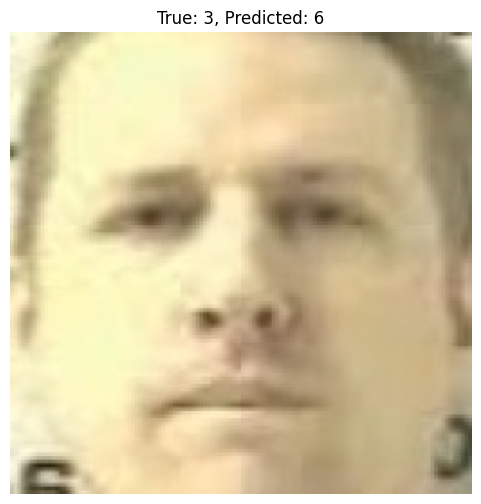

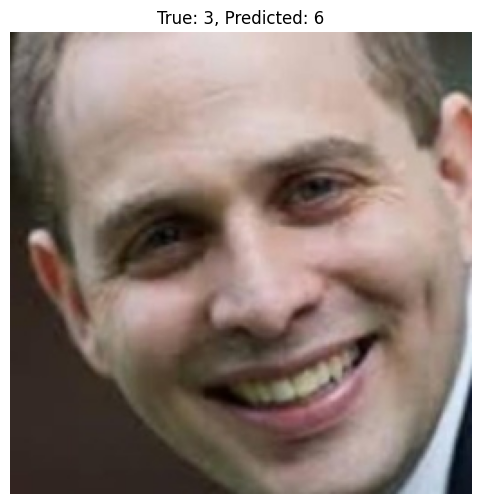

In [221]:
display_misclassified_samples(true_label_filter=3, predicted_label_filter=6)

In [21]:
X_train_white_men, y_train_menages, train_paths_men = joblib.load("processed_faces/white_men/train_data/train_dataset.pkl")
X_train_white_women, y_train_womenages, train_paths_women = joblib.load("processed_faces/white_women/train_data/train_dataset.pkl")

X_test_white_men, y_test_menages, test_paths_men = joblib.load("processed_faces/white_men/test_data/test_dataset.pkl")
X_test_white_women, y_test_womenages, test_paths_women = joblib.load("processed_faces/white_women/test_data/test_dataset.pkl")


In [22]:
X_train = np.concatenate((X_train_white_men, X_train_white_women), axis=0)
y_train = np.concatenate((np.zeros(len(y_train_menages)), np.ones(len(y_train_womenages))), axis=0)  # 0 = Men, 1 = Women
train_paths = train_paths_men + train_paths_women

In [23]:
X_test = np.concatenate((X_test_white_men, X_test_white_women), axis=0)
y_test = np.concatenate((np.zeros(len(y_test_menages)), np.ones(len(y_test_womenages))), axis=0)  # 0 = Men, 1 = Women
test_paths = test_paths_men + test_paths_women

In [24]:
joblib.dump((X_train, y_train, train_paths), "processed_faces/train_white_data_gender.pkl")
joblib.dump((X_test, y_test, test_paths), "processed_faces/test_white_data_gender.pkl")

['processed_faces/test_white_data_gender.pkl']

In [25]:
pca = PCA(n_components=0.95, svd_solver='full')

In [26]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
np.save("processed_faces/white_gender_train_pca.npy", X_train_pca)
np.save("processed_faces/white_gender_test_pca.npy", X_test_pca)
joblib.dump(pca, "processed_faces/gender_white_pca_model.pkl")

['processed_faces/gender_white_pca_model.pkl']

In [28]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"train_paths length: {len(train_paths)}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"test_paths length: {len(test_paths)}")

X_train shape: (6978, 12288)
y_train shape: (6978,)
train_paths length: 6978
X_test shape: (1746, 12288)
y_test shape: (1746,)
test_paths length: 1746


In [29]:
svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, max_iter=50000)
print("Training SVM...")
svm.fit(X_train_pca, y_train)
print("Training complete.")
joblib.dump(svm, "processed_faces/gender_white_svm_model.pkl")

Training SVM...
Training complete.


['processed_faces/gender_white_svm_model.pkl']

In [30]:
y_pred = svm.predict(X_test_pca)

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    0, 1
])

<Figure size 1000x800 with 0 Axes>

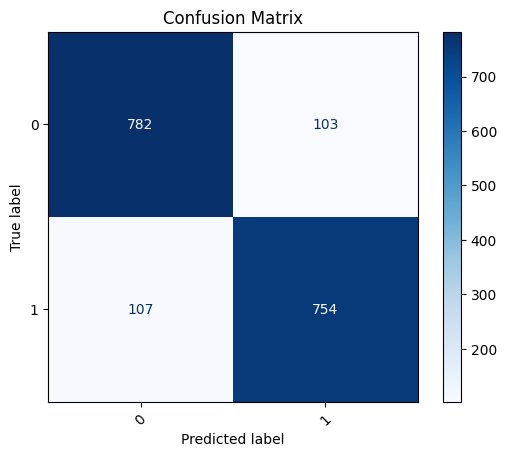

In [32]:
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix")
plt.show()

In [22]:
pca_for_gender = joblib.load("processed_faces\gender_white_pca_model.pkl")
svm_for_gender = joblib.load("processed_faces\gender_white_svm_model.pkl")

pca_for_men_age = joblib.load("processed_faces\white_men\pca_model.pkl")
svm_for_men_age = joblib.load("processed_faces\white_men\svm_model.pkl")

pca_for_woomen_age = joblib.load("processed_faces\white_women\pca_model.pkl")
svm_for_women_age = joblib.load("processed_faces\white_women\svm_model.pkl")

In [23]:
def classify_all_faces(folder_path='myphotos', file_name='me.jpg'):
    file_path = os.path.join(folder_path, file_name)
    image = cv2.imread(file_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.35, minNeighbors=5, minSize=(10, 10))

    results = []  

    for (x, y, w, h) in faces:
        x, y, w, h = map(int, [x, y, w, h])
        face = image[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (256, 256), interpolation=cv2.INTER_AREA)

        resized_folder = os.path.join(folder_path, 'resized')
        os.makedirs(resized_folder, exist_ok=True)
        image_path = os.path.join(resized_folder, file_name[:-4] + f'_resized_{x}_{y}.jpg')
        cv2.imwrite(image_path, face_resized)

        lbp_image = lbp.get_RGB(image_path)
        histogram = lbp.LBP_histogram(lbp_image)
        x_hist = np.array(histogram).reshape(1, -1)

        x_pca_gender = pca_for_gender.transform(x_hist)
        predicted_gender = svm_for_gender.predict(x_pca_gender)[0]
        gender_label = "Men" if predicted_gender == 0 else "Women"

        if predicted_gender == 0:
            x_pca_age = pca_for_men_age.transform(x_hist)
            probs = svm_for_men_age.predict_proba(x_pca_age)
        else:
            x_pca_age = pca_for_woomen_age.transform(x_hist)
            probs = svm_for_women_age.predict_proba(x_pca_age)

        predicted_class = np.argmax(probs)
        top_3_classes = np.argsort(probs[0])[-3:][::-1]
        top_3_probs = probs[0][top_3_classes]

        age_groups = {
            0: '[0 - 6]',
            1: '[7 - 17]',
            2: '[18 - 28]',
            3: '[29 - 35]',
            4: '[36 - 44]',
            5: '[45 - 53]',
            6: '[54 - 62]',
            7: '[63+]'
        }

        label = f"{gender_label}, Age: {age_groups[predicted_class]}"
        print(f"Face at (x={x}, y={y}):\n{label}")

        results.append({
            'rect': (x, y, w, h),
            'label': label
        })

    for result in results:
        x, y, w, h = result['rect']
        label = result['label']

        rectangle_thickness = 2
        font_scale = 1
        font_thickness = 2

        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), rectangle_thickness)

        text_x = max(int(x - w / 3), 10)
        text_y = int(y + h + 40)
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

        rect_x1 = text_x
        rect_y1 = text_y - text_height - 10
        rect_x2 = text_x + text_width
        rect_y2 = text_y + baseline

        rect_x1 = max(0, rect_x1)
        rect_y1 = max(0, rect_y1)
        rect_x2 = min(image.shape[1], rect_x2)
        rect_y2 = min(image.shape[0], rect_y2)

        overlay = image.copy()
        cv2.rectangle(overlay, (rect_x1, rect_y1), (rect_x2, rect_y2), (255, 255, 255), -1)
        alpha = 0.5
        cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)

        cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness)

    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [25]:
mes = [f'me{i}.jpg' for i in range(1, 17)]

for me in mes:
    classify_all_faces(folder_path='myphotos\me2', file_name=me)

KeyboardInterrupt: 

In [16]:
men_age_test_data = joblib.load("processed_faces/white_men/test_data/test_dataset.pkl")

In [17]:
men_age_predictions = joblib.load("processed_faces/white_men/test_data/test_predictions.pkl")
men_age_true = men_age_test_data[1]

In [ ]:
women_age_test_data = joblib.load("processed_faces/white_women/test_data/test_dataset.pkl")
women_age_predictions = joblib.load("processed_faces/white_women/test_data/test_predictions.pkl")
women_age_true = women_age_test_data[1]

In [19]:
len(women_age_true)

861

In [20]:
len(men_age_true)

885

In [38]:
men_pred_sex = y_pred[:885]
women_pred_sex = y_pred[885:]

In [47]:
def acc_of_good_age_prediction_if_good_sex_prediction(age_true, age_pred, sex, sex_pred):
    age_pred_where_correct_sex_pred = age_pred[np.where(sex_pred == sex)]
    age_true_where_correct_sex_pred = age_true[np.where(sex_pred == sex)]
    s1 = 0
    s2 = 0
    for age_predicted, actual_age in zip(age_pred_where_correct_sex_pred, age_true_where_correct_sex_pred):
        if age_predicted == actual_age:
            s1 += 1
            s2 += 1
        if abs(age_predicted - actual_age) == 1:
            s2 += 0.5
    
    acc = s1 / len(age_pred_where_correct_sex_pred)
    my_acc = s2 / len(age_true_where_correct_sex_pred)
    
    return acc, my_acc


In [48]:
acc_of_good_age_prediction_if_good_sex_prediction(men_age_true, men_age_predictions, 0, men_pred_sex)

(0.4053708439897698, 0.5869565217391305)